## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import friedman3Dataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np

## Import Dataset 


In [3]:
n_features = 4
n_samples= 100
n_target = 1
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  14.240887  1120.063218  0.792381  2.767897  1.524655
1  65.351899   663.686545  0.023527  6.770909  0.301145
2  86.121614   903.362491  0.946195  4.363072  1.664077
3  63.977170  1435.004561  0.167085  1.618263  1.196510
4  96.256107   385.072659  0.468226  5.014894  1.102099


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)

print(X.shape)
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(80, 4)
(80,)
(20, 4)
(20,)


## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.547
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              22.98
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                    1.80e-12
Time:                        16:20:44   Log-Likelihood:                         -88.015
No. Observations:                  80   AIC:                                      184.0
Df Residuals:                      76   BIC:                                      193.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

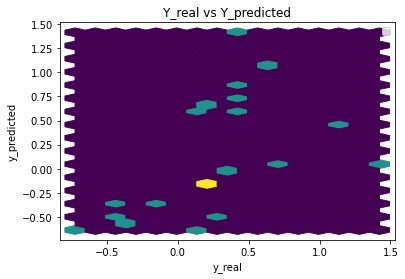

Performance Metrics
Mean Squared Error: 0.33102090766176934
Mean Absolute Error: 0.4692204726573198
Manhattan distance: 9.384409453146397
Euclidean distance: 2.573017324705644


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)

Learning rate set to 0.027471
0:	learn: 1.0639487	total: 73.6ms	remaining: 1m 13s
1:	learn: 1.0524228	total: 74.3ms	remaining: 37.1s
2:	learn: 1.0398079	total: 75.1ms	remaining: 25s
3:	learn: 1.0276044	total: 75.6ms	remaining: 18.8s
4:	learn: 1.0160835	total: 76.4ms	remaining: 15.2s
5:	learn: 1.0042277	total: 77.6ms	remaining: 12.9s
6:	learn: 0.9923816	total: 78.2ms	remaining: 11.1s
7:	learn: 0.9807630	total: 79.3ms	remaining: 9.84s
8:	learn: 0.9682020	total: 79.9ms	remaining: 8.79s
9:	learn: 0.9566928	total: 80.5ms	remaining: 7.97s
10:	learn: 0.9459523	total: 81.1ms	remaining: 7.29s
11:	learn: 0.9358526	total: 82.4ms	remaining: 6.79s
12:	learn: 0.9270130	total: 83.1ms	remaining: 6.31s
13:	learn: 0.9165889	total: 83.6ms	remaining: 5.89s
14:	learn: 0.9057284	total: 84.2ms	remaining: 5.53s
15:	learn: 0.8941908	total: 84.7ms	remaining: 5.21s
16:	learn: 0.8831086	total: 86.2ms	remaining: 4.98s
17:	learn: 0.8718322	total: 86.8ms	remaining: 4.73s
18:	learn: 0.8636158	total: 87.3ms	remaining:

61:	learn: 0.5581370	total: 144ms	remaining: 2.18s
62:	learn: 0.5526971	total: 145ms	remaining: 2.15s
63:	learn: 0.5479291	total: 148ms	remaining: 2.17s
64:	learn: 0.5425691	total: 149ms	remaining: 2.14s
65:	learn: 0.5378798	total: 149ms	remaining: 2.11s
66:	learn: 0.5334592	total: 150ms	remaining: 2.08s
67:	learn: 0.5287808	total: 151ms	remaining: 2.07s
68:	learn: 0.5243822	total: 151ms	remaining: 2.04s
69:	learn: 0.5193401	total: 153ms	remaining: 2.03s
70:	learn: 0.5141925	total: 154ms	remaining: 2.01s
71:	learn: 0.5096273	total: 155ms	remaining: 1.99s
72:	learn: 0.5054601	total: 155ms	remaining: 1.97s
73:	learn: 0.5011897	total: 157ms	remaining: 1.96s
74:	learn: 0.4973405	total: 157ms	remaining: 1.94s
75:	learn: 0.4932954	total: 158ms	remaining: 1.92s
76:	learn: 0.4895232	total: 161ms	remaining: 1.93s
77:	learn: 0.4857150	total: 161ms	remaining: 1.91s
78:	learn: 0.4820610	total: 162ms	remaining: 1.89s
79:	learn: 0.4776548	total: 163ms	remaining: 1.88s
80:	learn: 0.4735296	total: 165

150:	learn: 0.2986946	total: 351ms	remaining: 1.97s
151:	learn: 0.2973476	total: 365ms	remaining: 2.03s
152:	learn: 0.2956095	total: 366ms	remaining: 2.02s
153:	learn: 0.2941962	total: 366ms	remaining: 2.01s
154:	learn: 0.2926668	total: 368ms	remaining: 2s
155:	learn: 0.2914874	total: 368ms	remaining: 1.99s
156:	learn: 0.2900628	total: 371ms	remaining: 1.99s
157:	learn: 0.2883354	total: 373ms	remaining: 1.99s
158:	learn: 0.2863115	total: 374ms	remaining: 1.98s
159:	learn: 0.2849069	total: 375ms	remaining: 1.97s
160:	learn: 0.2836113	total: 375ms	remaining: 1.96s
161:	learn: 0.2821686	total: 376ms	remaining: 1.94s
162:	learn: 0.2807703	total: 376ms	remaining: 1.93s
163:	learn: 0.2797820	total: 380ms	remaining: 1.94s
164:	learn: 0.2781679	total: 381ms	remaining: 1.93s
165:	learn: 0.2767004	total: 381ms	remaining: 1.92s
166:	learn: 0.2748741	total: 382ms	remaining: 1.9s
167:	learn: 0.2732420	total: 386ms	remaining: 1.91s
168:	learn: 0.2721132	total: 388ms	remaining: 1.91s
169:	learn: 0.27

218:	learn: 0.2155955	total: 454ms	remaining: 1.62s
219:	learn: 0.2147241	total: 459ms	remaining: 1.63s
220:	learn: 0.2137086	total: 467ms	remaining: 1.65s
221:	learn: 0.2128443	total: 470ms	remaining: 1.65s
222:	learn: 0.2119369	total: 472ms	remaining: 1.64s
223:	learn: 0.2112241	total: 474ms	remaining: 1.64s
224:	learn: 0.2105545	total: 475ms	remaining: 1.64s
225:	learn: 0.2096775	total: 476ms	remaining: 1.63s
226:	learn: 0.2091808	total: 476ms	remaining: 1.62s
227:	learn: 0.2083290	total: 485ms	remaining: 1.64s
228:	learn: 0.2075484	total: 486ms	remaining: 1.64s
229:	learn: 0.2066378	total: 487ms	remaining: 1.63s
230:	learn: 0.2056023	total: 487ms	remaining: 1.62s
231:	learn: 0.2047223	total: 488ms	remaining: 1.61s
232:	learn: 0.2039794	total: 488ms	remaining: 1.61s
233:	learn: 0.2032890	total: 490ms	remaining: 1.6s
234:	learn: 0.2025783	total: 494ms	remaining: 1.61s
235:	learn: 0.2018770	total: 495ms	remaining: 1.6s
236:	learn: 0.2009539	total: 496ms	remaining: 1.6s
237:	learn: 0.1

268:	learn: 0.1770899	total: 545ms	remaining: 1.48s
269:	learn: 0.1764964	total: 546ms	remaining: 1.48s
270:	learn: 0.1759110	total: 559ms	remaining: 1.5s
271:	learn: 0.1753589	total: 560ms	remaining: 1.5s
272:	learn: 0.1747439	total: 560ms	remaining: 1.49s
273:	learn: 0.1740702	total: 564ms	remaining: 1.49s
274:	learn: 0.1732990	total: 639ms	remaining: 1.68s
275:	learn: 0.1727999	total: 641ms	remaining: 1.68s
276:	learn: 0.1723384	total: 649ms	remaining: 1.69s
277:	learn: 0.1715031	total: 652ms	remaining: 1.69s
278:	learn: 0.1706821	total: 665ms	remaining: 1.72s
279:	learn: 0.1698904	total: 666ms	remaining: 1.71s
280:	learn: 0.1692254	total: 668ms	remaining: 1.71s
281:	learn: 0.1688650	total: 669ms	remaining: 1.7s
282:	learn: 0.1684028	total: 670ms	remaining: 1.7s
283:	learn: 0.1676318	total: 672ms	remaining: 1.69s
284:	learn: 0.1669295	total: 673ms	remaining: 1.69s
285:	learn: 0.1662983	total: 674ms	remaining: 1.68s
286:	learn: 0.1655830	total: 676ms	remaining: 1.68s
287:	learn: 0.16

316:	learn: 0.1510916	total: 717ms	remaining: 1.54s
317:	learn: 0.1507057	total: 718ms	remaining: 1.54s
318:	learn: 0.1502566	total: 720ms	remaining: 1.54s
319:	learn: 0.1498203	total: 721ms	remaining: 1.53s
320:	learn: 0.1494136	total: 723ms	remaining: 1.53s
321:	learn: 0.1487596	total: 723ms	remaining: 1.52s
322:	learn: 0.1482866	total: 723ms	remaining: 1.52s
323:	learn: 0.1479241	total: 724ms	remaining: 1.51s
324:	learn: 0.1472919	total: 732ms	remaining: 1.52s
325:	learn: 0.1468426	total: 733ms	remaining: 1.51s
326:	learn: 0.1464933	total: 734ms	remaining: 1.51s
327:	learn: 0.1458720	total: 736ms	remaining: 1.51s
328:	learn: 0.1455405	total: 736ms	remaining: 1.5s
329:	learn: 0.1451818	total: 737ms	remaining: 1.5s
330:	learn: 0.1445731	total: 738ms	remaining: 1.49s
331:	learn: 0.1437395	total: 739ms	remaining: 1.49s
332:	learn: 0.1432445	total: 741ms	remaining: 1.48s
333:	learn: 0.1424839	total: 742ms	remaining: 1.48s
334:	learn: 0.1420733	total: 743ms	remaining: 1.48s
335:	learn: 0.

438:	learn: 0.1028165	total: 844ms	remaining: 1.08s
439:	learn: 0.1027647	total: 851ms	remaining: 1.08s
440:	learn: 0.1027136	total: 852ms	remaining: 1.08s
441:	learn: 0.1022497	total: 854ms	remaining: 1.08s
442:	learn: 0.1021994	total: 869ms	remaining: 1.09s
443:	learn: 0.1018846	total: 870ms	remaining: 1.09s
444:	learn: 0.1018350	total: 870ms	remaining: 1.08s
445:	learn: 0.1013785	total: 871ms	remaining: 1.08s
446:	learn: 0.1012955	total: 871ms	remaining: 1.08s
447:	learn: 0.1009514	total: 875ms	remaining: 1.08s
448:	learn: 0.1006116	total: 875ms	remaining: 1.07s
449:	learn: 0.1003194	total: 876ms	remaining: 1.07s
450:	learn: 0.1002384	total: 876ms	remaining: 1.07s
451:	learn: 0.0997089	total: 877ms	remaining: 1.06s
452:	learn: 0.0993737	total: 878ms	remaining: 1.06s
453:	learn: 0.0988231	total: 881ms	remaining: 1.06s
454:	learn: 0.0985269	total: 882ms	remaining: 1.06s
455:	learn: 0.0980861	total: 888ms	remaining: 1.06s
456:	learn: 0.0977982	total: 890ms	remaining: 1.06s
457:	learn: 

490:	learn: 0.0875819	total: 932ms	remaining: 966ms
491:	learn: 0.0875182	total: 934ms	remaining: 965ms
492:	learn: 0.0873508	total: 935ms	remaining: 961ms
493:	learn: 0.0870247	total: 935ms	remaining: 958ms
494:	learn: 0.0866887	total: 936ms	remaining: 955ms
495:	learn: 0.0866263	total: 937ms	remaining: 952ms
496:	learn: 0.0864631	total: 938ms	remaining: 950ms
497:	learn: 0.0864096	total: 939ms	remaining: 946ms
498:	learn: 0.0860910	total: 942ms	remaining: 946ms
499:	learn: 0.0857620	total: 944ms	remaining: 944ms
500:	learn: 0.0857013	total: 946ms	remaining: 943ms
501:	learn: 0.0853769	total: 948ms	remaining: 940ms
502:	learn: 0.0850663	total: 949ms	remaining: 937ms
503:	learn: 0.0847476	total: 949ms	remaining: 934ms
504:	learn: 0.0845903	total: 950ms	remaining: 931ms
505:	learn: 0.0845308	total: 952ms	remaining: 929ms
506:	learn: 0.0841527	total: 953ms	remaining: 926ms
507:	learn: 0.0839983	total: 968ms	remaining: 938ms
508:	learn: 0.0837504	total: 972ms	remaining: 938ms
509:	learn: 

563:	learn: 0.0709193	total: 1.05s	remaining: 816ms
564:	learn: 0.0708729	total: 1.06s	remaining: 817ms
565:	learn: 0.0706403	total: 1.06s	remaining: 814ms
566:	learn: 0.0703350	total: 1.06s	remaining: 812ms
567:	learn: 0.0702895	total: 1.06s	remaining: 809ms
568:	learn: 0.0701459	total: 1.06s	remaining: 806ms
569:	learn: 0.0699183	total: 1.06s	remaining: 803ms
570:	learn: 0.0697772	total: 1.07s	remaining: 801ms
571:	learn: 0.0695311	total: 1.07s	remaining: 804ms
572:	learn: 0.0693437	total: 1.07s	remaining: 802ms
573:	learn: 0.0691545	total: 1.08s	remaining: 799ms
574:	learn: 0.0689495	total: 1.08s	remaining: 796ms
575:	learn: 0.0686531	total: 1.08s	remaining: 794ms
576:	learn: 0.0683614	total: 1.08s	remaining: 791ms
577:	learn: 0.0681622	total: 1.08s	remaining: 788ms
578:	learn: 0.0681179	total: 1.08s	remaining: 785ms
579:	learn: 0.0680744	total: 1.08s	remaining: 782ms
580:	learn: 0.0678446	total: 1.08s	remaining: 780ms
581:	learn: 0.0675034	total: 1.08s	remaining: 777ms
582:	learn: 

699:	learn: 0.0465980	total: 1.2s	remaining: 515ms
700:	learn: 0.0464195	total: 1.21s	remaining: 515ms
701:	learn: 0.0463942	total: 1.21s	remaining: 514ms
702:	learn: 0.0461427	total: 1.21s	remaining: 512ms
703:	learn: 0.0460118	total: 1.24s	remaining: 521ms
704:	learn: 0.0458680	total: 1.24s	remaining: 519ms
705:	learn: 0.0456982	total: 1.24s	remaining: 517ms
706:	learn: 0.0455571	total: 1.27s	remaining: 528ms
707:	learn: 0.0454378	total: 1.27s	remaining: 526ms
708:	learn: 0.0452956	total: 1.37s	remaining: 562ms
709:	learn: 0.0451684	total: 1.37s	remaining: 559ms
710:	learn: 0.0449594	total: 1.37s	remaining: 557ms
711:	learn: 0.0448036	total: 1.37s	remaining: 555ms
712:	learn: 0.0446892	total: 1.37s	remaining: 552ms
713:	learn: 0.0446696	total: 1.37s	remaining: 550ms
714:	learn: 0.0446038	total: 1.37s	remaining: 547ms
715:	learn: 0.0443689	total: 1.37s	remaining: 545ms
716:	learn: 0.0442782	total: 1.37s	remaining: 542ms
717:	learn: 0.0441567	total: 1.37s	remaining: 540ms
718:	learn: 0

729:	learn: 0.0429245	total: 1.38s	remaining: 511ms
730:	learn: 0.0429065	total: 1.4s	remaining: 514ms
731:	learn: 0.0427598	total: 1.4s	remaining: 512ms
732:	learn: 0.0426155	total: 1.4s	remaining: 509ms
733:	learn: 0.0424633	total: 1.4s	remaining: 507ms
734:	learn: 0.0423217	total: 1.4s	remaining: 504ms
735:	learn: 0.0421955	total: 1.4s	remaining: 504ms
736:	learn: 0.0420712	total: 1.41s	remaining: 502ms
737:	learn: 0.0420142	total: 1.41s	remaining: 500ms
738:	learn: 0.0418011	total: 1.41s	remaining: 498ms
739:	learn: 0.0417158	total: 1.41s	remaining: 496ms
740:	learn: 0.0415949	total: 1.42s	remaining: 495ms
741:	learn: 0.0413876	total: 1.42s	remaining: 494ms
742:	learn: 0.0413270	total: 1.42s	remaining: 491ms
743:	learn: 0.0411238	total: 1.42s	remaining: 489ms
744:	learn: 0.0408860	total: 1.42s	remaining: 487ms
745:	learn: 0.0407694	total: 1.42s	remaining: 485ms
746:	learn: 0.0405723	total: 1.42s	remaining: 482ms
747:	learn: 0.0404444	total: 1.42s	remaining: 480ms
748:	learn: 0.0403

855:	learn: 0.0300147	total: 1.49s	remaining: 251ms
856:	learn: 0.0299244	total: 1.49s	remaining: 249ms
857:	learn: 0.0298445	total: 1.5s	remaining: 248ms
858:	learn: 0.0297146	total: 1.5s	remaining: 246ms
859:	learn: 0.0296023	total: 1.5s	remaining: 244ms
860:	learn: 0.0295244	total: 1.5s	remaining: 242ms
861:	learn: 0.0293834	total: 1.5s	remaining: 240ms
862:	learn: 0.0292734	total: 1.5s	remaining: 238ms
863:	learn: 0.0292617	total: 1.5s	remaining: 236ms
864:	learn: 0.0292502	total: 1.5s	remaining: 234ms
865:	learn: 0.0291250	total: 1.5s	remaining: 232ms
866:	learn: 0.0290372	total: 1.5s	remaining: 231ms
867:	learn: 0.0289296	total: 1.5s	remaining: 229ms
868:	learn: 0.0288775	total: 1.5s	remaining: 227ms
869:	learn: 0.0288263	total: 1.5s	remaining: 225ms
870:	learn: 0.0286901	total: 1.5s	remaining: 223ms
871:	learn: 0.0285825	total: 1.5s	remaining: 221ms
872:	learn: 0.0285327	total: 1.5s	remaining: 219ms
873:	learn: 0.0283996	total: 1.51s	remaining: 217ms
874:	learn: 0.0282957	total:

# TabNet regressor

In [7]:
n_epochs = 1000
batch_size = 32

(80,)
Device used : cpu


epoch 0  | loss: 1.17197 | train_mse: 7.16543 | train_mae: 2.14764 |  0:00:01s
epoch 1  | loss: 0.98975 | train_mse: 4.59723 | train_mae: 1.64303 |  0:00:01s


epoch 2  | loss: 0.41184 | train_mse: 4.91237 | train_mae: 1.57332 |  0:00:01s
epoch 3  | loss: 0.50729 | train_mse: 4.94235 | train_mae: 1.48337 |  0:00:01s
epoch 4  | loss: 0.54666 | train_mse: 3.0116  | train_mae: 1.31379 |  0:00:01s


epoch 5  | loss: 0.47403 | train_mse: 1.87317 | train_mae: 1.08429 |  0:00:01s


epoch 6  | loss: 0.4457  | train_mse: 1.58474 | train_mae: 1.04983 |  0:00:02s
epoch 7  | loss: 0.33622 | train_mse: 1.28867 | train_mae: 0.92134 |  0:00:02s


epoch 8  | loss: 0.48001 | train_mse: 1.04404 | train_mae: 0.81862 |  0:00:03s
epoch 9  | loss: 0.55078 | train_mse: 0.83012 | train_mae: 0.73537 |  0:00:03s


epoch 10 | loss: 0.59689 | train_mse: 0.63728 | train_mae: 0.63015 |  0:00:03s


epoch 11 | loss: 0.43406 | train_mse: 0.64135 | train_mae: 0.62047 |  0:00:03s


epoch 12 | loss: 0.48033 | train_mse: 0.67139 | train_mae: 0.62421 |  0:00:03s


epoch 13 | loss: 0.28717 | train_mse: 0.66129 | train_mae: 0.60006 |  0:00:04s


epoch 14 | loss: 0.40293 | train_mse: 0.69873 | train_mae: 0.59205 |  0:00:04s


epoch 15 | loss: 0.37123 | train_mse: 0.66991 | train_mae: 0.57157 |  0:00:05s
epoch 16 | loss: 0.43115 | train_mse: 0.62362 | train_mae: 0.55887 |  0:00:05s


epoch 17 | loss: 0.23512 | train_mse: 0.42813 | train_mae: 0.46741 |  0:00:05s


epoch 18 | loss: 0.25661 | train_mse: 0.30573 | train_mae: 0.40365 |  0:00:05s


epoch 19 | loss: 0.2364  | train_mse: 0.29803 | train_mae: 0.40367 |  0:00:06s


epoch 20 | loss: 0.27939 | train_mse: 0.30113 | train_mae: 0.39045 |  0:00:06s


epoch 21 | loss: 0.18958 | train_mse: 0.32295 | train_mae: 0.40715 |  0:00:06s


epoch 22 | loss: 0.24265 | train_mse: 0.3973  | train_mae: 0.44223 |  0:00:07s
epoch 23 | loss: 0.31092 | train_mse: 0.35103 | train_mae: 0.39418 |  0:00:07s


epoch 24 | loss: 0.25757 | train_mse: 0.33233 | train_mae: 0.39596 |  0:00:07s
epoch 25 | loss: 0.39919 | train_mse: 0.25245 | train_mae: 0.37087 |  0:00:07s


epoch 26 | loss: 0.17142 | train_mse: 0.18698 | train_mae: 0.33305 |  0:00:08s
epoch 27 | loss: 0.16158 | train_mse: 0.13744 | train_mae: 0.28684 |  0:00:08s


epoch 28 | loss: 0.21497 | train_mse: 0.15177 | train_mae: 0.2997  |  0:00:08s


epoch 29 | loss: 0.2618  | train_mse: 0.18029 | train_mae: 0.32885 |  0:00:08s


epoch 30 | loss: 0.17932 | train_mse: 0.18273 | train_mae: 0.32605 |  0:00:08s


epoch 31 | loss: 0.17157 | train_mse: 0.19267 | train_mae: 0.32976 |  0:00:09s
epoch 32 | loss: 0.15539 | train_mse: 0.17219 | train_mae: 0.31708 |  0:00:09s


epoch 33 | loss: 0.17336 | train_mse: 0.17681 | train_mae: 0.31509 |  0:00:09s


epoch 34 | loss: 0.2725  | train_mse: 0.21186 | train_mae: 0.32616 |  0:00:09s


epoch 35 | loss: 0.12908 | train_mse: 0.32459 | train_mae: 0.39828 |  0:00:10s
epoch 36 | loss: 0.24416 | train_mse: 0.3443  | train_mae: 0.40954 |  0:00:10s


epoch 37 | loss: 0.18726 | train_mse: 0.30336 | train_mae: 0.39287 |  0:00:10s


epoch 38 | loss: 0.16285 | train_mse: 0.25843 | train_mae: 0.369   |  0:00:10s


epoch 39 | loss: 0.17981 | train_mse: 0.23022 | train_mae: 0.35673 |  0:00:11s


epoch 40 | loss: 0.13194 | train_mse: 0.19832 | train_mae: 0.31422 |  0:00:11s


epoch 41 | loss: 0.1906  | train_mse: 0.16812 | train_mae: 0.28284 |  0:00:11s


epoch 42 | loss: 0.28231 | train_mse: 0.27219 | train_mae: 0.35641 |  0:00:11s


epoch 43 | loss: 0.1384  | train_mse: 0.37635 | train_mae: 0.41456 |  0:00:12s


epoch 44 | loss: 0.23178 | train_mse: 0.28448 | train_mae: 0.37578 |  0:00:13s
epoch 45 | loss: 0.15148 | train_mse: 0.16624 | train_mae: 0.29329 |  0:00:13s


epoch 46 | loss: 0.14215 | train_mse: 0.13867 | train_mae: 0.27105 |  0:00:13s


epoch 47 | loss: 0.16484 | train_mse: 0.19058 | train_mae: 0.30888 |  0:00:13s
epoch 48 | loss: 0.25024 | train_mse: 0.29208 | train_mae: 0.37552 |  0:00:13s


epoch 49 | loss: 0.17631 | train_mse: 0.29614 | train_mae: 0.38317 |  0:00:14s
epoch 50 | loss: 0.13922 | train_mse: 0.27381 | train_mae: 0.37318 |  0:00:14s


epoch 51 | loss: 0.15975 | train_mse: 0.21843 | train_mae: 0.34303 |  0:00:14s
epoch 52 | loss: 0.12596 | train_mse: 0.14039 | train_mae: 0.2812  |  0:00:14s


epoch 53 | loss: 0.11488 | train_mse: 0.1208  | train_mae: 0.26568 |  0:00:14s
epoch 54 | loss: 0.15353 | train_mse: 0.12334 | train_mae: 0.26892 |  0:00:14s


epoch 55 | loss: 0.08623 | train_mse: 0.10194 | train_mae: 0.24219 |  0:00:14s
epoch 56 | loss: 0.12883 | train_mse: 0.09651 | train_mae: 0.23512 |  0:00:15s


epoch 57 | loss: 0.17366 | train_mse: 0.1235  | train_mae: 0.26519 |  0:00:15s


epoch 58 | loss: 0.12373 | train_mse: 0.12504 | train_mae: 0.27067 |  0:00:15s


epoch 59 | loss: 0.15844 | train_mse: 0.11439 | train_mae: 0.26401 |  0:00:16s
epoch 60 | loss: 0.09875 | train_mse: 0.08662 | train_mae: 0.231   |  0:00:16s


epoch 61 | loss: 0.24524 | train_mse: 0.08439 | train_mae: 0.2195  |  0:00:16s


epoch 62 | loss: 0.18603 | train_mse: 0.09446 | train_mae: 0.22483 |  0:00:17s


epoch 63 | loss: 0.11348 | train_mse: 0.09446 | train_mae: 0.22601 |  0:00:17s


epoch 64 | loss: 0.20874 | train_mse: 0.10679 | train_mae: 0.24537 |  0:00:17s


epoch 65 | loss: 0.13665 | train_mse: 0.08033 | train_mae: 0.20715 |  0:00:18s


epoch 66 | loss: 0.24223 | train_mse: 0.08178 | train_mae: 0.20746 |  0:00:18s


epoch 67 | loss: 0.13654 | train_mse: 0.09354 | train_mae: 0.22733 |  0:00:18s


epoch 68 | loss: 0.11315 | train_mse: 0.08355 | train_mae: 0.21357 |  0:00:18s


epoch 69 | loss: 0.12666 | train_mse: 0.09463 | train_mae: 0.23282 |  0:00:19s


epoch 70 | loss: 0.23808 | train_mse: 0.09104 | train_mae: 0.22131 |  0:00:19s


epoch 71 | loss: 0.1677  | train_mse: 0.1231  | train_mae: 0.25819 |  0:00:20s


epoch 72 | loss: 0.21225 | train_mse: 0.11299 | train_mae: 0.24947 |  0:00:20s


epoch 73 | loss: 0.11085 | train_mse: 0.08357 | train_mae: 0.21093 |  0:00:21s


epoch 74 | loss: 0.19847 | train_mse: 0.07459 | train_mae: 0.20353 |  0:00:21s


epoch 75 | loss: 0.14474 | train_mse: 0.07669 | train_mae: 0.21304 |  0:00:22s


epoch 76 | loss: 0.13722 | train_mse: 0.08514 | train_mae: 0.22133 |  0:00:22s


epoch 77 | loss: 0.15505 | train_mse: 0.07883 | train_mae: 0.21095 |  0:00:22s


epoch 78 | loss: 0.1674  | train_mse: 0.07893 | train_mae: 0.21181 |  0:00:23s


epoch 79 | loss: 0.19528 | train_mse: 0.07829 | train_mae: 0.2091  |  0:00:23s


epoch 80 | loss: 0.15666 | train_mse: 0.07159 | train_mae: 0.1997  |  0:00:24s


epoch 81 | loss: 0.10017 | train_mse: 0.07176 | train_mae: 0.20364 |  0:00:25s


epoch 82 | loss: 0.11228 | train_mse: 0.07408 | train_mae: 0.20964 |  0:00:25s


epoch 83 | loss: 0.16639 | train_mse: 0.06255 | train_mae: 0.19101 |  0:00:25s


epoch 84 | loss: 0.16799 | train_mse: 0.06338 | train_mae: 0.18974 |  0:00:26s


epoch 85 | loss: 0.13115 | train_mse: 0.07476 | train_mae: 0.20998 |  0:00:26s


epoch 86 | loss: 0.10865 | train_mse: 0.08005 | train_mae: 0.21568 |  0:00:26s
epoch 87 | loss: 0.09012 | train_mse: 0.06435 | train_mae: 0.18931 |  0:00:26s


epoch 88 | loss: 0.12394 | train_mse: 0.06391 | train_mae: 0.20006 |  0:00:27s
epoch 89 | loss: 0.14705 | train_mse: 0.07096 | train_mae: 0.21084 |  0:00:27s


epoch 90 | loss: 0.1717  | train_mse: 0.06292 | train_mae: 0.1902  |  0:00:27s


epoch 91 | loss: 0.15426 | train_mse: 0.07295 | train_mae: 0.21045 |  0:00:27s
epoch 92 | loss: 0.11977 | train_mse: 0.08195 | train_mae: 0.22705 |  0:00:27s


epoch 93 | loss: 0.1724  | train_mse: 0.09001 | train_mae: 0.23697 |  0:00:28s
epoch 94 | loss: 0.09526 | train_mse: 0.09755 | train_mae: 0.238   |  0:00:28s


epoch 95 | loss: 0.1742  | train_mse: 0.0882  | train_mae: 0.21657 |  0:00:28s


epoch 96 | loss: 0.16644 | train_mse: 0.08626 | train_mae: 0.21422 |  0:00:28s
epoch 97 | loss: 0.15094 | train_mse: 0.1176  | train_mae: 0.27125 |  0:00:28s


epoch 98 | loss: 0.19848 | train_mse: 0.1687  | train_mae: 0.31798 |  0:00:29s


epoch 99 | loss: 0.15878 | train_mse: 0.11401 | train_mae: 0.26062 |  0:00:30s


epoch 100| loss: 0.14351 | train_mse: 0.07731 | train_mae: 0.21815 |  0:00:30s


epoch 101| loss: 0.44804 | train_mse: 0.08883 | train_mae: 0.23517 |  0:00:30s


epoch 102| loss: 0.11778 | train_mse: 0.11143 | train_mae: 0.2587  |  0:00:31s
epoch 103| loss: 0.10829 | train_mse: 0.1193  | train_mae: 0.26226 |  0:00:31s


epoch 104| loss: 0.10287 | train_mse: 0.12596 | train_mae: 0.26373 |  0:00:31s
epoch 105| loss: 0.13137 | train_mse: 0.11433 | train_mae: 0.26153 |  0:00:31s


epoch 106| loss: 0.17872 | train_mse: 0.08961 | train_mae: 0.22924 |  0:00:31s


epoch 107| loss: 0.24014 | train_mse: 0.07635 | train_mae: 0.21071 |  0:00:31s


epoch 108| loss: 0.11024 | train_mse: 0.06361 | train_mae: 0.19179 |  0:00:32s
epoch 109| loss: 0.11324 | train_mse: 0.07661 | train_mae: 0.22013 |  0:00:32s


epoch 110| loss: 0.12884 | train_mse: 0.08081 | train_mae: 0.21991 |  0:00:32s


epoch 111| loss: 0.16856 | train_mse: 0.06453 | train_mae: 0.19697 |  0:00:32s
epoch 112| loss: 0.1525  | train_mse: 0.07    | train_mae: 0.20435 |  0:00:33s


epoch 113| loss: 0.12971 | train_mse: 0.06851 | train_mae: 0.20044 |  0:00:33s
epoch 114| loss: 0.21118 | train_mse: 0.06409 | train_mae: 0.18936 |  0:00:33s


epoch 115| loss: 0.16252 | train_mse: 0.078   | train_mae: 0.20546 |  0:00:33s
epoch 116| loss: 0.15463 | train_mse: 0.10022 | train_mae: 0.23507 |  0:00:33s


epoch 117| loss: 0.16599 | train_mse: 0.13432 | train_mae: 0.2698  |  0:00:33s
epoch 118| loss: 0.12352 | train_mse: 0.1484  | train_mae: 0.28924 |  0:00:34s


epoch 119| loss: 0.12917 | train_mse: 0.12926 | train_mae: 0.27671 |  0:00:34s
epoch 120| loss: 0.14154 | train_mse: 0.12338 | train_mae: 0.27547 |  0:00:34s


epoch 121| loss: 0.13256 | train_mse: 0.09676 | train_mae: 0.23843 |  0:00:34s
epoch 122| loss: 0.09843 | train_mse: 0.08491 | train_mae: 0.21146 |  0:00:34s


epoch 123| loss: 0.08738 | train_mse: 0.08285 | train_mae: 0.21043 |  0:00:34s
epoch 124| loss: 0.25588 | train_mse: 0.08632 | train_mae: 0.2194  |  0:00:34s


epoch 125| loss: 0.31576 | train_mse: 0.12663 | train_mae: 0.24301 |  0:00:35s
epoch 126| loss: 0.12723 | train_mse: 0.1531  | train_mae: 0.25045 |  0:00:35s


epoch 127| loss: 0.14955 | train_mse: 0.14537 | train_mae: 0.24674 |  0:00:35s
epoch 128| loss: 0.12362 | train_mse: 0.06698 | train_mae: 0.20566 |  0:00:35s


epoch 129| loss: 0.17807 | train_mse: 0.06375 | train_mae: 0.19762 |  0:00:35s
epoch 130| loss: 0.1154  | train_mse: 0.07104 | train_mae: 0.20401 |  0:00:35s


epoch 131| loss: 0.10641 | train_mse: 0.07209 | train_mae: 0.20469 |  0:00:35s
epoch 132| loss: 0.22871 | train_mse: 0.06947 | train_mae: 0.20578 |  0:00:35s


epoch 133| loss: 0.08915 | train_mse: 0.07126 | train_mae: 0.20918 |  0:00:36s
epoch 134| loss: 0.18792 | train_mse: 0.06898 | train_mae: 0.20511 |  0:00:36s


epoch 135| loss: 0.11809 | train_mse: 0.06946 | train_mae: 0.20083 |  0:00:36s
epoch 136| loss: 0.12013 | train_mse: 0.07272 | train_mae: 0.20438 |  0:00:36s


epoch 137| loss: 0.0748  | train_mse: 0.07473 | train_mae: 0.21037 |  0:00:36s

Early stopping occurred at epoch 137 with best_epoch = 87 and best_train_mae = 0.18931
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.18930771425153037
FINAL TEST SCORE FOR dataset: 0.3710352235756217
{'loss': [1.1719676971435546, 0.9897521257400512, 0.41183569431304934, 0.5072914302349091, 0.5466603517532349, 0.4740328311920166, 0.44570392370224, 0.33622156977653506, 0.48000500202178953, 0.5507756769657135, 0.5968937277793884, 0.4340630769729614, 0.48033369779586793, 0.2871693819761276, 0.40293204188346865, 0.3712265431880951, 0.43114917278289794, 0.23512484431266784, 0.2566102802753448, 0.23639670759439468, 0.27939221560955046, 0.18957877159118652, 0.24264824986457825, 0.3109207272529602, 0.257570743560791, 0.39919088780879974, 0.17142076194286346, 0.16157830953598024, 0.21496670842170715, 0.26180365979671477, 0.17931632101535797, 0.17156807482242584, 0.1553884118795

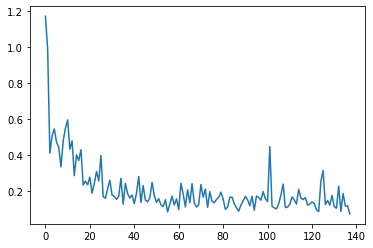

In [8]:
lr = 0.02

print(y_train.shape)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)